In [1]:
#let us start with some basic imports

# for data Analysis

import numpy as np
import pandas as pd

# for data visualization

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# k-means for cluster
from sklearn.cluster import KMeans

%matplotlib inline


In [8]:
# for interactive data visualization
#python -m pip install --upgrade pip
!pip install plotly


!pip install cufflinks 
from plotly import __version__

import cufflinks as cf

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

init_notebook_mode(connected=True)

cf.go_offline()


     ---------------------------------------- 0.0/81.7 kB ? eta -:--:--
     ----- ---------------------------------- 10.2/81.7 kB ? eta -:--:--
     ---------------------------- --------- 61.4/81.7 kB 544.7 kB/s eta 0:00:01
     -------------------------------------- 81.7/81.7 kB 650.0 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68725 sha256=b1f7ab15a767f24cfa94dc82d3e6c43298dae9e4e829ef3094faf8d0d988bb1b
  Stored in directory: c:\users\amish\appdata\local\pip\cache\wheels\c3\bf\8f\afa0730b29e347e8c1071049f89748c1262e7a14a838820ae6
Successfully built cufflinks


C:\Users\amish\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning:

Blowfish has been deprecated



In [9]:
# for importing data

df = pd.read_csv("C:\\Users\\amish\\Downloads\\RBI DATA states_wise_population_Income.csv")
# head of Dataframe

df.head(4)

,States_Union Territories,2000-01-INC,2011-12-INC,2001 - LIT,2011- LIT,2001 - POP,2011- POP,2001 -SEX_Ratio,2011 -SEX_Ratio,2001 -UNEMP,2011 -UNEMP,2001 -Poverty,2011 -Poverty
0,Andaman and Nicobar Islands,25047,89642,81.30,86.63,356,381,846,876,34,54,20.99,1.00
1,Andhra Pradesh,17195,64773,60.47,67.02,76210,84581,978,993,8,12,15.77,9.20
2,Arunachal Pradesh,15260,71366,54.34,65.39,1098,1384,893,938,5,17,33.47,34.67
3,Assam,12803,36320,63.25,72.19,26656,31206,935,958,39,45,36.09,31.98


In [10]:
# Dataframe info.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   States_Union Territories  32 non-null     object 
 1   2000-01-INC               32 non-null     int64  
 2   2011-12-INC               32 non-null     int64  
 3   2001 - LIT                32 non-null     float64
 4   2011- LIT                 32 non-null     float64
 5   2001 - POP                32 non-null     int64  
 6   2011- POP                 32 non-null     int64  
 7   2001 -SEX_Ratio           32 non-null     int64  
 8   2011 -SEX_Ratio           32 non-null     int64  
 9   2001 -UNEMP               32 non-null     int64  
 10  2011 -UNEMP               32 non-null     int64  
 11  2001 -Poverty             32 non-null     float64
 12  2011 -Poverty             32 non-null     float64
dtypes: float64(4), int64(8), object(1)
memory usage: 3.4+ KB


In [11]:
# basic descriptive statistics for 2001

df[['2000-01-INC','2001 - LIT','2001 - POP','2001 -SEX_Ratio','2001 -UNEMP','2001 -Poverty']].describe()

,2000-01-INC,2001 - LIT,2001 - POP,2001 -SEX_Ratio,2001 -UNEMP,2001 -Poverty
count,32.00000,32.000000,32.000000,32.00000,32.000000,32.000000
mean,19696.53125,69.810625,32134.437500,928.87500,21.406250,22.627500
std,10191.63120,11.149199,38054.631775,56.70737,20.731555,12.279176
min,6415.00000,47.000000,356.000000,777.00000,4.000000,3.480000
25%,12965.75000,62.950000,2218.000000,896.75000,8.000000,12.180000
50%,16418.00000,68.975000,20989.500000,934.50000,17.000000,21.395000
75%,22781.50000,78.945000,53765.000000,969.00000,25.000000,32.870000
max,49771.00000,90.860000,166198.000000,1058.00000,93.000000,47.150000


In [12]:
# descriptive statistics for 2011

df[['2011-12-INC','2011- LIT','2011- POP','2011 -SEX_Ratio','2011 -UNEMP','2011 -Poverty']].describe()

,2011-12-INC,2011- LIT,2011- POP,2011 -SEX_Ratio,2011 -UNEMP,2011 -Poverty
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,74792.500000,78.240312,37818.843750,945.468750,29.468750,18.591563
std,40960.182286,8.733646,45189.884314,53.105485,32.223999,11.086188
min,22582.000000,61.800000,381.000000,818.000000,3.000000,1.000000
25%,47958.000000,71.712500,2636.750000,916.500000,9.000000,9.855000
50%,66413.000000,77.465000,25448.000000,949.000000,20.500000,15.670000
75%,89198.000000,86.090000,62958.250000,976.750000,28.250000,29.985000
max,211570.000000,94.000000,199812.000000,1084.000000,151.000000,39.930000


In [13]:
# missing data in percentage

df.isnull().sum()/len(df)

States_Union Territories    0.0
2000-01-INC                 0.0
2011-12-INC                 0.0
2001 - LIT                  0.0
2011- LIT                   0.0
2001 - POP                  0.0
2011- POP                   0.0
2001 -SEX_Ratio             0.0
2011 -SEX_Ratio             0.0
2001 -UNEMP                 0.0
2011 -UNEMP                 0.0
2001 -Poverty               0.0
2011 -Poverty               0.0
dtype: float64

<Figure size 1000x600 with 0 Axes>

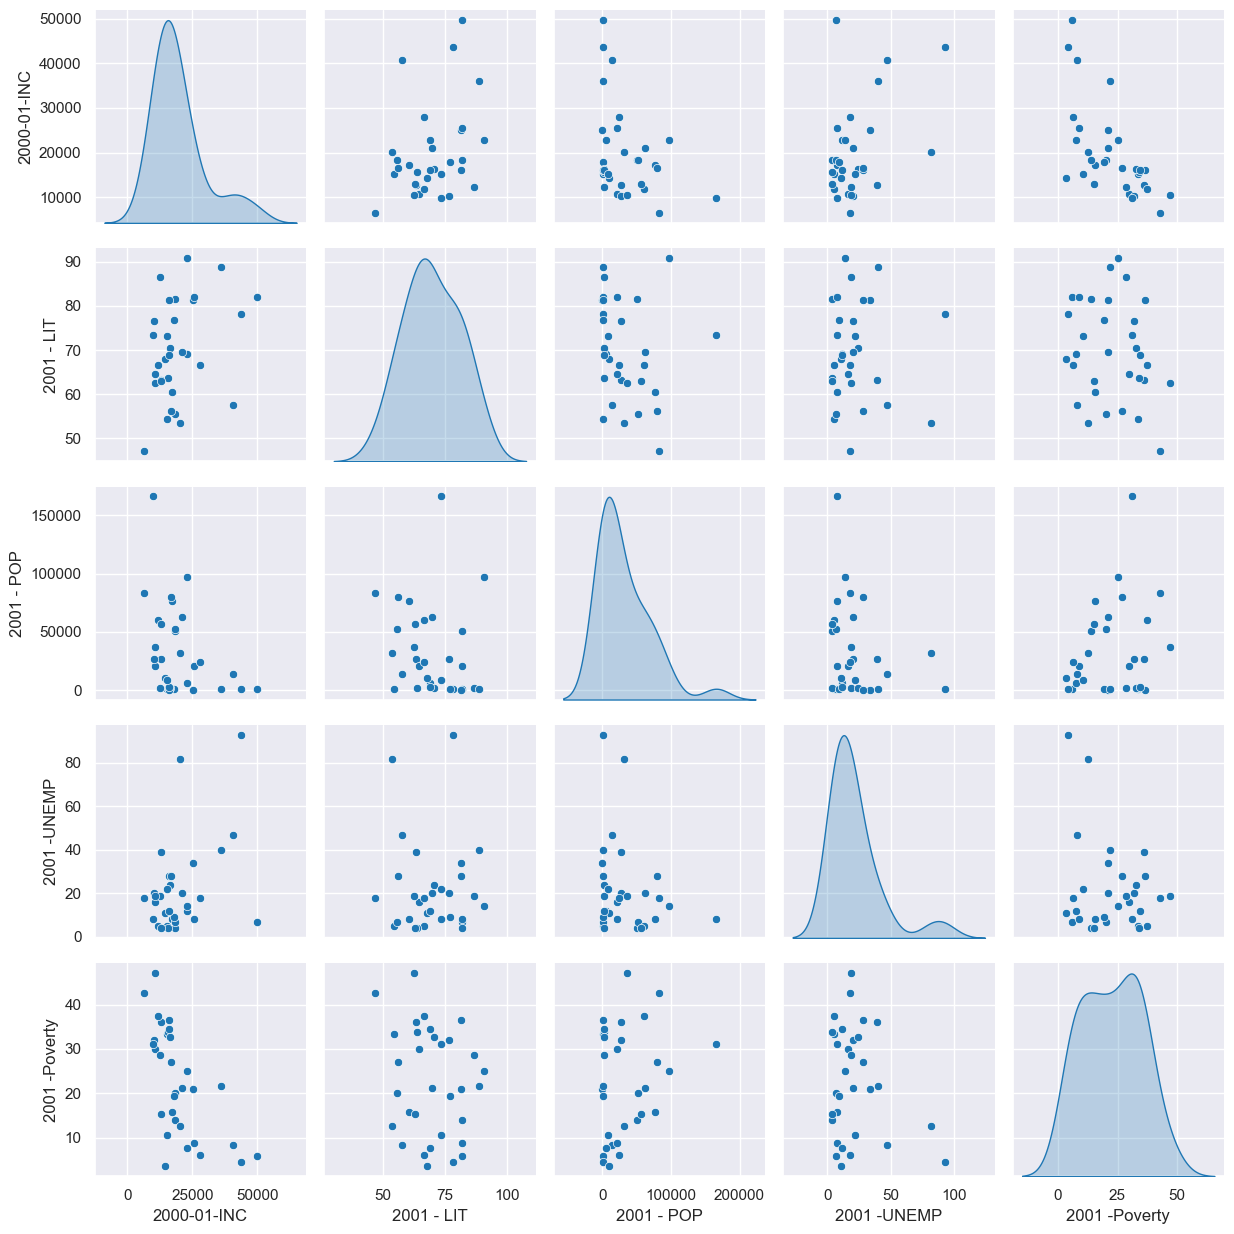

In [15]:
#plotting pariplot for 2001 state's income, Literacy rate, Poverty rate and umeployment rate

# data for plot
df_plot_data_2001 = df[['2000-01-INC','2001 - LIT','2001 - POP','2001 -UNEMP','2001 -Poverty']]

#plotting in seaborn
sns.set_style(style='darkgrid')
plt.figure(figsize = (10,6))
sns.set_context(context ='notebook',font_scale=1);
sns.pairplot(df_plot_data_2001,aspect=1,diag_kind='kde');
plt.tight_layout();

<Figure size 1000x600 with 0 Axes>

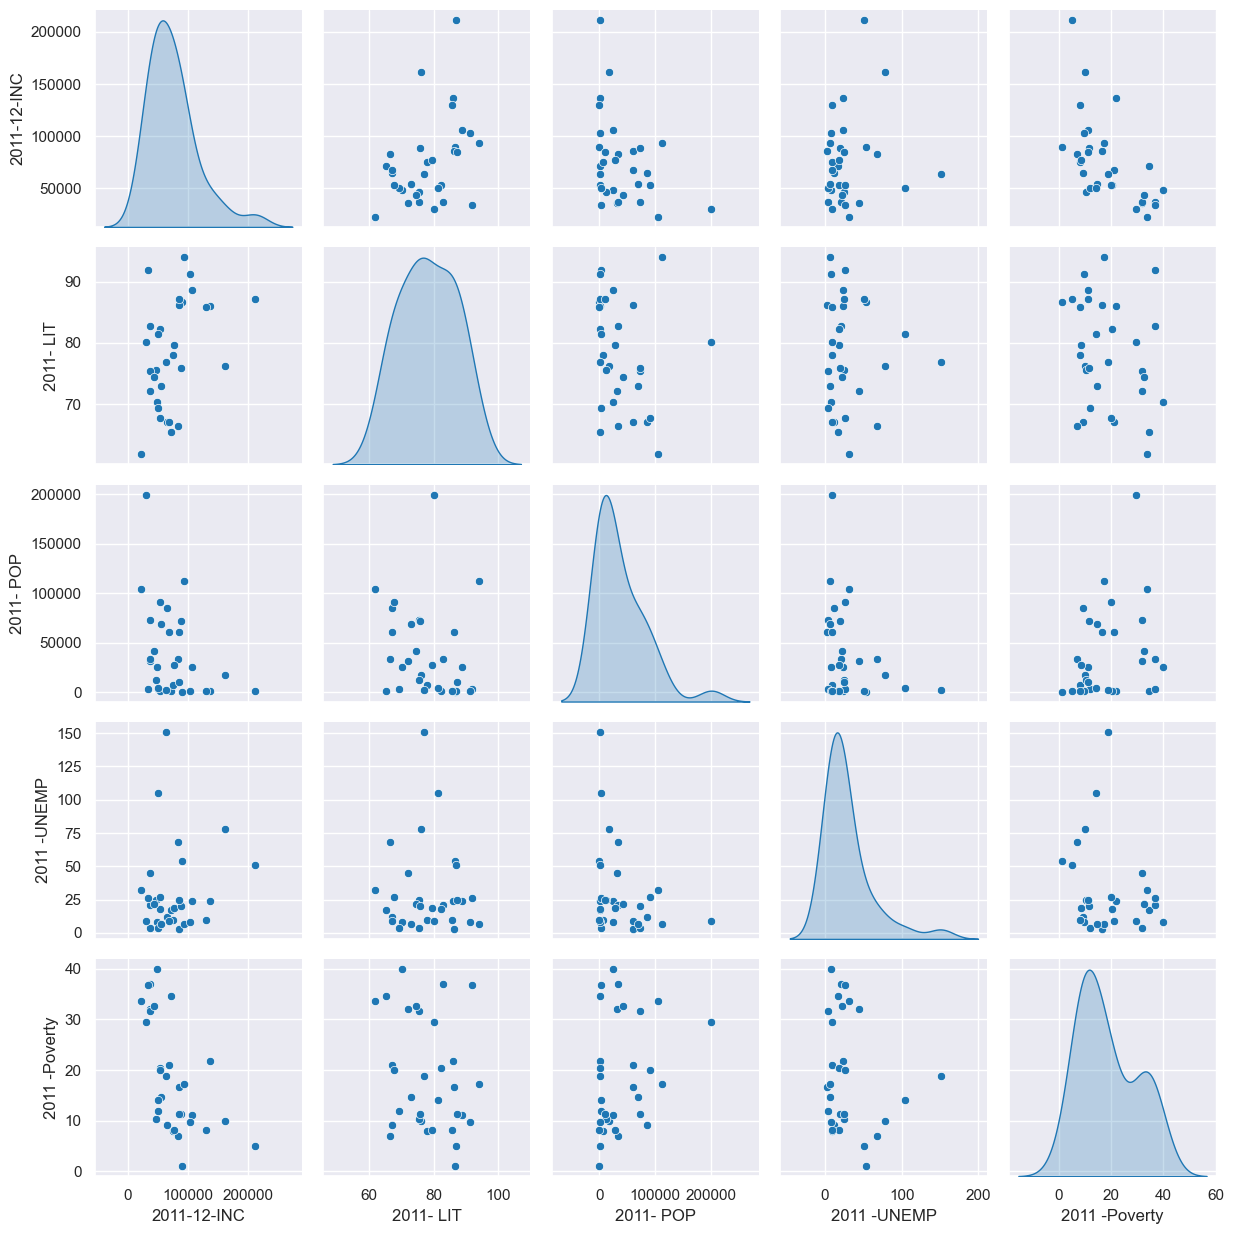

In [17]:
#plotting pariplot for 2001 state's income, Literacy rate, Poverty rate and umeployment rate

# data for plot
df_plot_data_2011 = df[['2011-12-INC','2011- LIT','2011- POP','2011 -UNEMP','2011 -Poverty']]

# plotting in seaborn
sns.set_style(style='darkgrid')
plt.figure(figsize = (10,6))
sns.set_context(context ='notebook',font_scale=1);
sns.pairplot(df_plot_data_2011,aspect=1,diag_kind='kde');
plt.tight_layout();

C:\Users\amish\AppData\Local\Temp\ipykernel_3144\2388338581.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



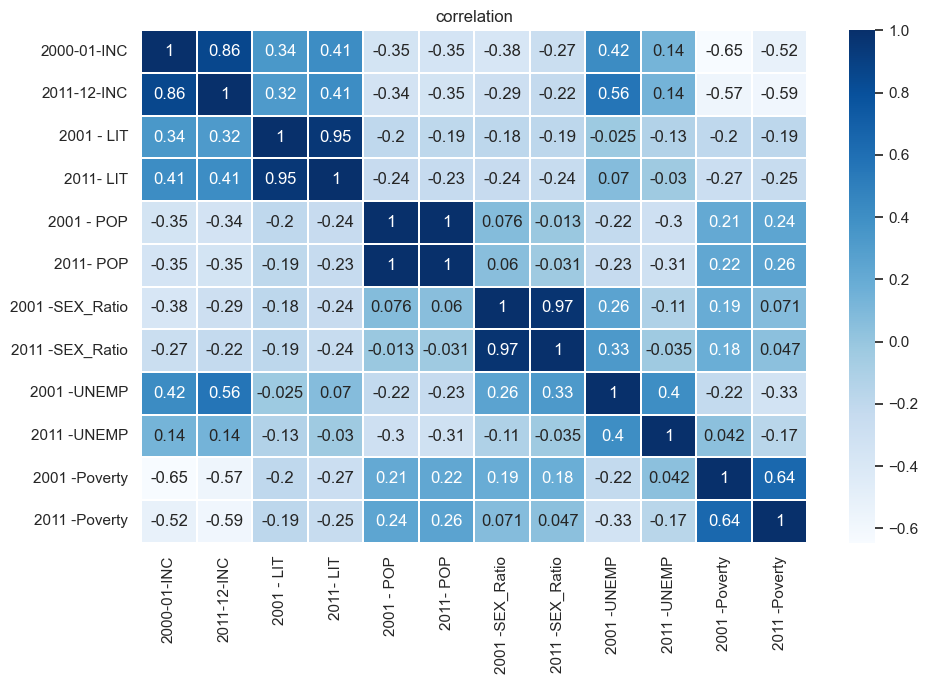

In [18]:
# correlation of the df
df_corr = df.corr()

#plotting in seaborn
plt.figure(figsize=(10,7))
sns.heatmap(df_corr,cmap='Blues',annot=True,linewidths=0.2,linecolor='white')
plt.title('correlation')
plt.tight_layout()

In [19]:
# min max scaler function

def min_max(x, y):
    y_min = y.min()
    y_max = y.max()
    MM = (x- y_min)/(y_max - y_min)
    return MM

In [20]:
# plotting Indian State's Income vs Literacy rate in year 2001

# data for plot
df_lit_inc_2001 = df[['States_Union Territories','2000-01-INC','2001 - LIT']]

# normalization of data because of different scale 
min_INC = df_lit_inc_2001['2000-01-INC'].min()
max_INC = df_lit_inc_2001['2000-01-INC'].max()
min_LIT = df_lit_inc_2001['2001 - LIT'].min()
max_LIT = df_lit_inc_2001['2001 - LIT'].max()

df_lit_inc_2001['2000-01-INC'] = df_lit_inc_2001['2000-01-INC'].apply(lambda x : (x- min_INC)/(max_INC - min_INC))
df_lit_inc_2001['2001 - LIT'] = df_lit_inc_2001['2001 - LIT'].apply(lambda x : (x- min_LIT)/(max_LIT - min_LIT))

# line plot in plotly
df_lit_inc_2001.iplot(kind='line',x='States_Union Territories',secondary_y='2001 - LIT',
                      colors=['#53D1BA','#D11E5D'],title='India State Income vs Literacy rate year_2001',
                      xTitle='States in India',yTitle='State Income_SDP',
                      secondary_y_title='literacy rate',theme='pearl')

# to see how closely the each state's income and Literacy rate is

In [22]:
# plotting Indian State's Income vs Literacy rate in year 2011

# data for plot
df_lit_inc_2011 = df[['States_Union Territories','2011-12-INC','2011- LIT']]

# normalization
df_lit_inc_2011['2011-12-INC'] = min_max(df_lit_inc_2011['2011-12-INC'],df_lit_inc_2011['2011-12-INC'])
df_lit_inc_2011['2011- LIT'] = min_max(df_lit_inc_2011['2011- LIT'],df_lit_inc_2011['2011- LIT'])

# plot
df_lit_inc_2011.iplot(x ='States_Union Territories',y='2011-12-INC',secondary_y ='2011- LIT',
                      colors = ['#70a3f9','#e7c269'],
                      title = 'India State Income vs Literacy rate year_2011',
                      xTitle='States in India',
                      yTitle ='State Income_SDP',secondary_y_title = 'literacy rate',
                     theme = 'pearl')

In [23]:
# calculating percentage change in the Income of the states and plotting

#increase = Increase ÷ Original Number × 100.

# took a copy of df and named it
df1 = df.copy()

# percentage change in income of the state
df1['INC_percentage_change'] = (df1['2011-12-INC'] - df1['2000-01-INC']) / df1['2000-01-INC']
# sorting before plot

df1_sorted = df1.sort_values(by='INC_percentage_change',ascending=True)

# plotting percentage change in states income from 2000 to 2011

df1_sorted.iplot(kind='bar',x='States_Union Territories',
                 y='INC_percentage_change',
                 theme='white',colors='#2997B7',
                title='percentage change in states income from 2000 to 2011',
                 yTitle = 'percentage')

In [24]:
df_2011_in = df[['2011-12-INC','2011- LIT','2011- POP','2011 -UNEMP','2011 -Poverty']]

In [25]:
# KMeans

from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler()

In [26]:
# scaling the data

std_df = pd.DataFrame(std_scale.fit_transform(df_2011_in),columns=df_2011_in.columns)
# K Means cluster 

k_means = KMeans(n_clusters = 4,random_state=1)

k_means.fit(std_df)

C:\Users\amish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\amish\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning:

Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.

  File "C:\Users\amish\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(
C:\Users\amish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



KMeans(n_clusters=4, random_state=1)

In [27]:
labels = k_means.labels_
df_2011_in["kmeans_4_cluster"] = labels

df_2011_in.head()

,2011-12-INC,2011- LIT,2011- POP,2011 -UNEMP,2011 -Poverty,kmeans_4_cluster
0,89642,86.63,381,54,1.00,2
1,64773,67.02,84581,12,9.20,0
2,71366,65.39,1384,17,34.67,1
3,36320,72.19,31206,45,31.98,1
4,22582,61.80,104099,32,33.74,1


In [28]:
df_2011_in["Name_of_State"] = df['States_Union Territories']
df_2011_in['kmeans_4_cluster'].unique()

array([2, 0, 1, 3])

In [29]:
df_cluster =df_2011_in.groupby(['kmeans_4_cluster']).mean()
# Tree plot
fig = px.treemap(df_2011_in, path = ['kmeans_4_cluster', 'Name_of_State'], values = '2011-12-INC',
                title="Clusters based on the income level and population",template='none')
fig.show()

C:\Users\amish\AppData\Local\Temp\ipykernel_3144\2095769933.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [30]:
state_income_Pov_rate_2011 = df1[['States_Union Territories','2011 -Poverty','2011-12-INC']]
        
state_income_Pov_rate_2011['2011 -Poverty'] = min_max(state_income_Pov_rate_2011['2011 -Poverty'],
                                                      state_income_Pov_rate_2011['2011 -Poverty'])

state_income_Pov_rate_2011['2011-12-INC'] = min_max(state_income_Pov_rate_2011['2011-12-INC'],
                                                      state_income_Pov_rate_2011['2011-12-INC']) 

state_income_Pov_rate_2011.sort_values(by='2011-12-INC').iplot(kind='bar',
                            x ='States_Union Territories',y ='2011-12-INC',
                            secondary_y ='2011 -Poverty',secondary_y_title='poverty rate',
                            colors =['#05ffa1','#b967ff'],
                            title ='state Income vs Poverty rate in each states in the 2011',
                            yTitle ='State income',xTitle ='States in india')

In [31]:
# data for plot
pov_income_rate_2001 = df1[['States_Union Territories','2001 -Poverty','2000-01-INC']]

# normalization
pov_income_rate_2001['2001 -Poverty'] = min_max(pov_income_rate_2001['2001 -Poverty'],pov_income_rate_2001['2001 -Poverty'])
pov_income_rate_2001['2000-01-INC'] = min_max(pov_income_rate_2001['2000-01-INC'],pov_income_rate_2001['2000-01-INC'])
        
# plotting state income vs poverty rate in 2001
pov_income_rate_2001.sort_values(by='2000-01-INC').iplot(kind='bar',x='States_Union Territories',y='2000-01-INC',secondary_y='2001 -Poverty',secondary_y_title='poverty rate',
                        colors=['#1ebbd7','#ffcc5c'],title='state Income vs Poverty rate in each states in the 2001',
                        yTitle='State income',xTitle ='States in india')


In [32]:
#ploting percentage change in Literacy rate in each state

#data for plot
df1['literacy_pct_change'] = df1['2011- LIT'] - df1['2001 - LIT']

#plot
df1.sort_values('literacy_pct_change').iplot(kind = 'bar',x = 'States_Union Territories',yTitle = 'percentage',
                                             y = 'literacy_pct_change',theme='white',colors='#1ABC9C',
                                             title = 'percentage change in states Literacy rate from 2000 to 2011')

In [33]:
# sorting and ploting percentage change in Literacy rate

df1.sort_values(by='literacy_pct_change').iplot(kind='line',x='States_Union Territories',y='INC_percentage_change',
                                               secondary_y='literacy_pct_change',secondary_y_title='Literacy rate change',
                                               title='Percentage change in Income vs percentage change in literacy rate from 2001 to 2011',
                                                yTitle='percentage',xTitle = 'States in India')

In [34]:
#plotting Poverty rate vs Literacy rate in 2001

pov_lit_rate_2001 = df1[['States_Union Territories','2001 -Poverty','2001 - LIT']]

pov_lit_rate_2001.iplot(kind='line',x='States_Union Territories',y='2001 - LIT',secondary_y='2001 -Poverty',secondary_y_title='poverty rate',
                        colors=['#ff6f69','#ffcc5c'],title='Poverty rate vs Literacy rate in each states in the 2001',
                        xTitle='States in India',yTitle='Literacy rate')

In [35]:
pov_lit_rate_2011 = df1[['States_Union Territories','2011 -Poverty','2011- LIT']]
        

pov_lit_rate_2011.sort_values(by='2011 -Poverty').iplot(kind='line',x='States_Union Territories',y='2011- LIT',secondary_y='2011 -Poverty',secondary_y_title='poverty rate',
                        colors=['#ff6f69','#ffcc5c'],title='Poverty rate vs Literacy rate in each states in the year 2011',
                        yTitle='Literacy rate',xTitle='States in India')

In [ ]:
#https://www.kaggle.com/code/gokulrajkmv/states-of-india-plotly-seaborn-kmeans-cluster/notebook